# Prediction of change in muscle mass based on baseline gene isoforms expression and metadata. The metadata includes details of age, height, sex, percentage change in muscle mass and exercise conditions

The data used is from three datasets:
1. The copd dataset
2. The volume dataset
3. The contratrain dataset

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor, LazyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.features import ParallelCoordinates
import lightgbm
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score, balanced_accuracy_score,f1_score, matthews_corrcoef
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_squared_error,accuracy_score, balanced_accuracy_score,f1_score, matthews_corrcoef, mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
import shap
shap.initjs()

## COPD dataset

In [3]:
copd = pd.read_csv("./Trainome_data/copd_baseline_without_spliceq_data.csv")
copd = copd.drop("Unnamed: 0", axis = 1)
copd

,participant,sample_id,ARF5-201,M6PR-201,ESRRA-201,FKBP4-201,NDUFAF7-201,FUCA2-201,CYP51A1-201,USP28-201,...,treatment,condition,time,study,age,height,weight,diagnosis,pct_change,category
0,FP102,102PreExcVLR12,2.67,34.85,14.33,51.13,10.01,5.53,9.84,70.93,...,vitd,RM10,PreExc,copd,65.80,151.50,84.00,none,22.21,High_responder
1,FP102,102PreExcVLR12,2.67,34.85,14.33,51.13,10.01,5.53,9.84,70.93,...,vitd,RM10,PreExc,copd,65.80,151.50,84.00,none,17.24,High_responder
2,FP103,103PreExcVLR23,0.61,25.43,19.37,44.94,13.22,4.61,0.63,41.49,...,placebo,RM30,PreExc,copd,70.90,170.00,82.50,none,1.05,mid_responder
3,FP103,103PreExcVLR23,0.61,25.43,19.37,44.94,13.22,4.61,0.63,41.49,...,placebo,RM30,PreExc,copd,70.90,170.00,82.50,none,14.01,mid_responder
4,FP105,105PreExcVLR38,3.21,38.36,25.12,41.67,18.03,7.89,5.95,45.72,...,placebo,RM10,PreExc,copd,67.00,162.50,65.00,none,12.05,mid_responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,FP246,246PreExcVLR518,1.71,31.16,21.15,40.67,15.81,6.49,0.00,48.41,...,placebo,RM10,PreExc,copd,64.30,165.00,61.00,none,-5.35,No_responder
113,FP246,246PreExcVLR518,1.71,31.16,21.15,40.67,15.81,6.49,0.00,48.41,...,placebo,RM10,PreExc,copd,64.30,165.00,61.00,none,6.10,mid_responder
114,FP249,249PreExcVLL529,8.96,29.75,25.37,78.26,14.04,3.15,1.93,40.82,...,placebo,RM30,PreExc,copd,63.60,171.00,64.40,copd,4.32,mid_responder
115,FP249,249PreExcVLL529,8.96,29.75,25.37,78.26,14.04,3.15,1.93,40.82,...,placebo,RM30,PreExc,copd,63.60,171.00,64.40,copd,8.29,mid_responder


## Volume dataset

In [4]:
vol = pd.read_csv("./Trainome_data/vol_baseline_without_spliceq.csv")
vol = vol.drop("Unnamed: 0", axis = 1)
vol

,participant,sample_id,ARF5-201,M6PR-201,ESRRA-201,FKBP4-201,NDUFAF7-201,FUCA2-201,CYP51A1-201,USP28-201,...,IRAK4-215,PHKB-218,study,condition,age,sex,height,weight,pct_change,category
0,FP11,FP11w0L,3.69,25.79,17.55,43.00,18.28,3.73,5.67,48.36,...,2.23,2.11,vol,single,22.30,male,180.00,76.50,-1.54,No_responder
1,FP11,FP11w0R,3.35,27.75,22.31,41.90,18.61,5.41,3.30,50.45,...,3.17,3.21,vol,multiple,22.30,male,180.00,76.50,0.18,No_responder
2,FP12,FP12w0L,5.50,26.90,20.00,53.96,16.60,3.19,2.56,42.37,...,4.13,3.97,vol,single,21.30,female,172.00,67.50,0.69,No_responder
3,FP12,FP12w0R,7.02,28.28,26.25,54.08,11.61,3.29,4.07,44.68,...,3.23,4.70,vol,multiple,21.30,female,172.00,67.50,-0.60,No_responder
4,FP13,FP13w0L,6.22,19.16,47.77,54.37,10.47,1.85,10.48,26.25,...,4.61,3.44,vol,multiple,22.70,male,186.50,69.00,12.12,High_responder
5,FP13,FP13w0R,4.55,25.88,27.91,46.78,11.38,2.98,6.86,42.08,...,2.02,0.00,vol,single,22.70,male,186.50,69.00,6.73,mid_responder
6,FP14,FP14w0L,7.48,31.57,23.52,54.34,13.61,4.50,6.95,44.79,...,3.58,4.20,vol,single,22.10,female,168.50,68.50,6.18,mid_responder
7,FP14,FP14w0R,5.90,22.83,18.86,29.90,9.99,5.06,0.99,39.98,...,2.40,0.92,vol,multiple,22.10,female,168.50,68.50,6.46,mid_responder
8,FP15,FP15w0L,8.56,21.94,43.48,36.90,14.69,2.98,5.45,40.69,...,0.00,4.09,vol,single,23.60,male,191.50,77.50,2.67,mid_responder
9,FP15,FP15w0R,7.63,20.27,33.92,36.83,13.34,2.73,3.36,39.54,...,0.30,4.74,vol,multiple,23.60,male,191.50,77.50,5.27,mid_responder


## Contratrain dataset

In [5]:
contratrain = pd.read_csv("./Trainome_data/contratrain_baseline_without_spliceq.csv")
contratrain = contratrain.drop("Unnamed: 0", axis = 1)
contratrain.head()

,participant,sample_id,ARF5-201,M6PR-201,ESRRA-201,FKBP4-201,NDUFAF7-201,FUCA2-201,CYP51A1-201,USP28-201,...,sex,condition,time,study,age,height,weight,group,pct_change,category
0,FP1,X1.subj1sample1,7.81,32.55,18.42,59.75,20.03,5.04,5.04,40.87,...,female,set0,t1,ct,21.00,183.00,95.70,1,3.77,mid_responder
1,FP1,X1.subj1sample1,7.81,32.55,18.42,59.75,20.03,5.04,5.04,40.87,...,female,set0,t1,ct,21.00,183.00,95.70,1,19.48,High_responder
2,FP1,X2.subj1sample6,11.24,33.77,18.44,57.64,18.17,6.27,5.35,40.26,...,female,set3,t1,ct,21.00,183.00,95.70,1,-1.85,No_responder
3,FP1,X2.subj1sample6,11.24,33.77,18.44,57.64,18.17,6.27,5.35,40.26,...,female,set3,t1,ct,21.00,183.00,95.70,1,13.02,mid_responder
4,FP41,X103.subj41sample2,5.83,22.12,15.11,46.19,15.67,4.81,1.34,61.81,...,male,set0,t1,ct,28.00,173.00,70.00,1,0.97,No_responder


There is an apparent inequality in the size of the datasets. I will thus extract the metadata alone from these datasets and load the isoform dataset that contains the cpm normalized data across all the samples

In [6]:
copd_metadata = copd[["participant", "sample_id", "sex", "condition", "study", 
                      "age", "height", "weight", "pct_change", "category"  ]]
#add X in front of sample_id to make it match the IDs on the isoform data
copd_metadata["sample_id"] = "X" + copd_metadata["sample_id"].astype(str)
copd_metadata

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category
0,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,22.21,High_responder
1,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,17.24,High_responder
2,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,1.05,mid_responder
3,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,14.01,mid_responder
4,FP105,X105PreExcVLR38,female,RM10,copd,67.00,162.50,65.00,12.05,mid_responder
...,...,...,...,...,...,...,...,...,...,...
112,FP246,X246PreExcVLR518,female,RM10,copd,64.30,165.00,61.00,-5.35,No_responder
113,FP246,X246PreExcVLR518,female,RM10,copd,64.30,165.00,61.00,6.10,mid_responder
114,FP249,X249PreExcVLL529,male,RM30,copd,63.60,171.00,64.40,4.32,mid_responder
115,FP249,X249PreExcVLL529,male,RM30,copd,63.60,171.00,64.40,8.29,mid_responder


In [7]:
#copd_metadata.to_csv("./Trainome_data/metadata as used in baseline prediction modelling/copd_metadata.csv", index = False)

In [8]:
contratrain_metadata = contratrain[["participant", "sample_id", "sex", "condition", "study", "age", 
                                    "height", "weight", "pct_change", "category" ]]
contratrain_metadata.head()

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category
0,FP1,X1.subj1sample1,female,set0,ct,21.00,183.00,95.70,3.77,mid_responder
1,FP1,X1.subj1sample1,female,set0,ct,21.00,183.00,95.70,19.48,High_responder
2,FP1,X2.subj1sample6,female,set3,ct,21.00,183.00,95.70,-1.85,No_responder
3,FP1,X2.subj1sample6,female,set3,ct,21.00,183.00,95.70,13.02,mid_responder
4,FP41,X103.subj41sample2,male,set0,ct,28.00,173.00,70.00,0.97,No_responder


In [9]:
#contratrain_metadata.to_csv("./Trainome_data/metadata as used in baseline prediction modelling/contratrain_metadata.csv", index = False)

In [10]:
vol_metadata = vol[["participant", "sample_id", "sex", "condition", "study", "age", 
                                    "height", "weight", "pct_change", "category" ]]
vol_metadata

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category
0,FP11,FP11w0L,male,single,vol,22.30,180.00,76.50,-1.54,No_responder
1,FP11,FP11w0R,male,multiple,vol,22.30,180.00,76.50,0.18,No_responder
2,FP12,FP12w0L,female,single,vol,21.30,172.00,67.50,0.69,No_responder
3,FP12,FP12w0R,female,multiple,vol,21.30,172.00,67.50,-0.60,No_responder
4,FP13,FP13w0L,male,multiple,vol,22.70,186.50,69.00,12.12,High_responder
5,FP13,FP13w0R,male,single,vol,22.70,186.50,69.00,6.73,mid_responder
6,FP14,FP14w0L,female,single,vol,22.10,168.50,68.50,6.18,mid_responder
7,FP14,FP14w0R,female,multiple,vol,22.10,168.50,68.50,6.46,mid_responder
8,FP15,FP15w0L,male,single,vol,23.60,191.50,77.50,2.67,mid_responder
9,FP15,FP15w0R,male,multiple,vol,23.60,191.50,77.50,5.27,mid_responder


In [11]:
#vol_metadata.to_csv("./Trainome_data/metadata as used in baseline prediction modelling/volume_metadata.csv", index = False)

## Load isoform data containing all the isoforms

In [12]:
#Load the full isoform counts
all_isoforms = pd.read_csv("./Trainome_data/all_data_cpm.csv")
#split the transcript name and drop the transcript name
all_isoforms[["transcript_name", "transcript_id"]] = all_isoforms["transcript_id"].str.split(pat="_", n= 1, expand = True)
#drop the r\"transcript_name" column
all_isoforms=all_isoforms.drop("transcript_name", axis = 1)
all_isoforms.set_index("transcript_id", inplace = True)
all_isoforms = all_isoforms.drop("Unnamed: 0", axis = 1)
all_isoforms = all_isoforms.T
all_isoforms = all_isoforms.reset_index()
all_isoforms = all_isoforms.rename(columns = {"index": "sample_id"})
all_isoforms

transcript_id,sample_id,ARF5-201,M6PR-201,ESRRA-201,FKBP4-201,NDUFAF7-201,FUCA2-201,CYP51A1-201,USP28-201,HSPB6-201,...,GATA2-213,UQCRHL-202,IFNGR1-215,FANCG-218,IL10RB-208,EPG5-219,PTK2-258,IRAK4-215,PHKB-218,IRF2-210
0,X1023WVLL11,1.93,26.20,19.72,47.77,13.21,4.78,2.58,50.06,627.34,...,0.33,1.49,6.89,0.00,0.79,0.71,0.00,3.49,6.45,0.00
1,X1023WVLR10,0.43,28.54,13.66,47.55,13.96,6.77,2.94,39.46,574.76,...,0.94,3.39,0.00,0.00,0.31,0.22,0.00,3.03,8.31,0.00
2,X102PostExcVLL14,5.03,23.80,21.58,50.96,18.78,6.08,8.91,60.46,630.50,...,1.15,2.87,0.00,1.18,0.34,0.79,1.15,1.95,0.00,0.42
3,X102PostExcVLR13,4.28,30.41,13.94,60.36,15.54,6.86,13.51,40.05,644.23,...,1.26,2.08,2.98,0.47,0.78,0.62,2.38,6.13,6.82,0.00
4,X102PreExcVLR12,2.67,34.85,14.33,51.13,10.01,5.53,9.84,70.93,538.28,...,1.61,1.71,1.46,0.00,1.72,0.23,3.19,4.61,2.72,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,X95.subj4sample3,6.97,34.42,27.49,45.54,15.68,7.20,4.22,64.58,284.73,...,0.85,0.50,2.86,0.00,1.09,0.00,9.32,1.87,2.09,0.28
614,X96.subj4sample6,6.32,25.09,26.43,34.06,12.81,5.39,3.54,46.37,211.74,...,1.71,0.12,3.33,0.50,0.52,0.28,2.84,2.49,2.72,0.17
615,X97.subj4sample8,4.68,28.82,14.43,32.73,11.38,4.32,0.49,52.14,188.12,...,0.96,0.17,0.39,0.31,0.72,0.48,7.04,2.20,3.57,0.11
616,X98.subj40sample7,4.62,26.14,24.12,46.64,17.07,4.85,4.78,44.12,167.49,...,0.72,0.16,1.75,0.41,1.00,0.28,4.66,3.14,3.09,0.41


In [13]:
# concatenate all the metadata together
metadata = pd.concat([copd_metadata, contratrain_metadata, vol_metadata], ignore_index = True)
metadata

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category
0,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,22.21,High_responder
1,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,17.24,High_responder
2,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,1.05,mid_responder
3,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,14.01,mid_responder
4,FP105,X105PreExcVLR38,female,RM10,copd,67.00,162.50,65.00,12.05,mid_responder
...,...,...,...,...,...,...,...,...,...,...
222,FP6,FP6w0R,female,single,vol,21.80,156.00,50.00,-0.81,No_responder
223,FP7,FP7w0L,male,multiple,vol,21.20,194.00,106.00,8.34,High_responder
224,FP7,FP7w0R,male,single,vol,21.20,194.00,106.00,11.31,High_responder
225,FP9,FP9w0L,male,single,vol,20.60,190.00,76.50,4.26,mid_responder


In [14]:
metadata.to_csv("./Trainome_data/metadata as used in baseline prediction modelling/all_metadata.csv", index=False)

In [15]:
#merge the metadata to the isoform data. This should extract the ones matching the metadata dataset.
all_baseline_df = metadata.merge(all_isoforms, on = ["sample_id"])
#check for missing values
all_baseline_df = all_baseline_df.dropna()
all_baseline_df

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category,...,GATA2-213,UQCRHL-202,IFNGR1-215,FANCG-218,IL10RB-208,EPG5-219,PTK2-258,IRAK4-215,PHKB-218,IRF2-210
0,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,22.21,High_responder,...,1.61,1.71,1.46,0.00,1.72,0.23,3.19,4.61,2.72,1.00
1,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,17.24,High_responder,...,1.61,1.71,1.46,0.00,1.72,0.23,3.19,4.61,2.72,1.00
2,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,1.05,mid_responder,...,1.20,5.73,0.00,0.91,1.18,0.00,4.59,3.01,0.00,0.00
3,FP103,X103PreExcVLR23,male,RM30,copd,70.90,170.00,82.50,14.01,mid_responder,...,1.20,5.73,0.00,0.91,1.18,0.00,4.59,3.01,0.00,0.00
4,FP105,X105PreExcVLR38,female,RM10,copd,67.00,162.50,65.00,12.05,mid_responder,...,1.34,5.97,0.00,0.66,0.74,0.20,2.91,4.02,5.72,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,FP6,FP6w0R,female,single,vol,21.80,156.00,50.00,-0.81,No_responder,...,1.40,5.81,3.98,0.27,1.22,0.60,2.46,0.44,4.52,0.44
223,FP7,FP7w0L,male,multiple,vol,21.20,194.00,106.00,8.34,High_responder,...,1.28,2.19,3.55,0.74,0.26,0.10,3.60,3.84,0.00,0.75
224,FP7,FP7w0R,male,single,vol,21.20,194.00,106.00,11.31,High_responder,...,1.42,2.52,3.15,0.72,0.42,0.29,3.88,4.17,5.15,0.15
225,FP9,FP9w0L,male,single,vol,20.60,190.00,76.50,4.26,mid_responder,...,1.12,4.25,2.02,0.68,0.72,0.18,5.73,3.34,3.90,0.27


In [ ]:
plt.scatter(all_baseline_df["category"],all_baseline_df["IL32-232"])
plt.xlabel("category of responder")
plt.ylabel("IL32-232 expression")
plt.show()

(array([ 1.,  1.,  9., 46., 81., 43., 31., 10.,  2.,  3.]),
 array([-26.46 , -19.733, -13.006,  -6.279,   0.448,   7.175,  13.902,
         20.629,  27.356,  34.083,  40.81 ]),
 <BarContainer object of 10 artists>)

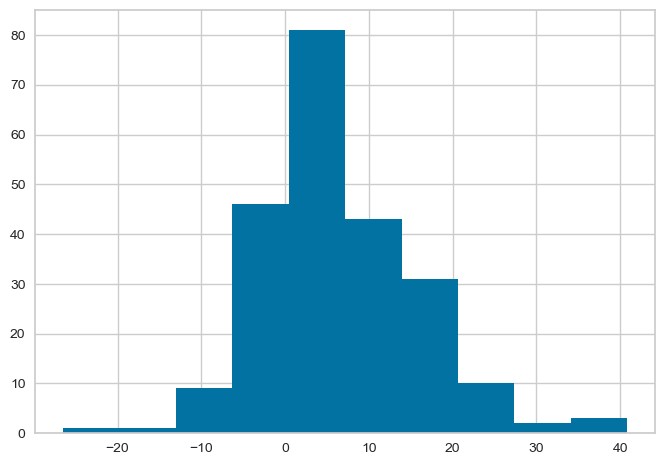

In [82]:
plt.hist(all_baseline_df["pct_change"])

In [16]:
#all_baseline_df.to_csv("./Trainome_data/metadata as used in baseline prediction modelling/all_baseline_and_metadata.csv",
#                       index = False)

In [17]:
#how many of these variables are categorical 
cat_var = all_baseline_df.select_dtypes(include=["object"])
cat_var.head()

,participant,sample_id,sex,condition,study,category
0,FP102,X102PreExcVLR12,female,RM10,copd,High_responder
1,FP102,X102PreExcVLR12,female,RM10,copd,High_responder
2,FP103,X103PreExcVLR23,male,RM30,copd,mid_responder
3,FP103,X103PreExcVLR23,male,RM30,copd,mid_responder
4,FP105,X105PreExcVLR38,female,RM10,copd,mid_responder


# Will use both classification (category) and regression (pct_change) for prediction

### Train classifier

In [18]:
#the classification modelling
X_class = all_baseline_df.drop(["participant","sample_id",  "category", "pct_change"], axis = 1)
X_class = pd.get_dummies(X_class)
y_class = all_baseline_df["category"]

In [19]:
#split into train and test. Test set will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class,test_size=.5,random_state =123)

In [38]:
#Use Lazy regressor to predict suitable ML models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [03:04<00:00,  6.38s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.49,0.44,None,0.49,12.58
BaggingClassifier,0.49,0.44,None,0.49,6.17
LinearDiscriminantAnalysis,0.50,0.43,None,0.49,2.74
RidgeClassifierCV,0.48,0.43,None,0.48,0.98
RidgeClassifier,0.48,0.43,None,0.48,0.86
LogisticRegression,0.44,0.43,None,0.44,2.84
AdaBoostClassifier,0.47,0.42,None,0.47,16.19
RandomForestClassifier,0.53,0.41,None,0.49,2.44
SGDClassifier,0.38,0.40,None,0.38,1.18


<AxesSubplot:title={'center':'Feature importance as ranked by Lightgbm with LGBClassifier'}, xlabel=' importance score', ylabel='Features'>

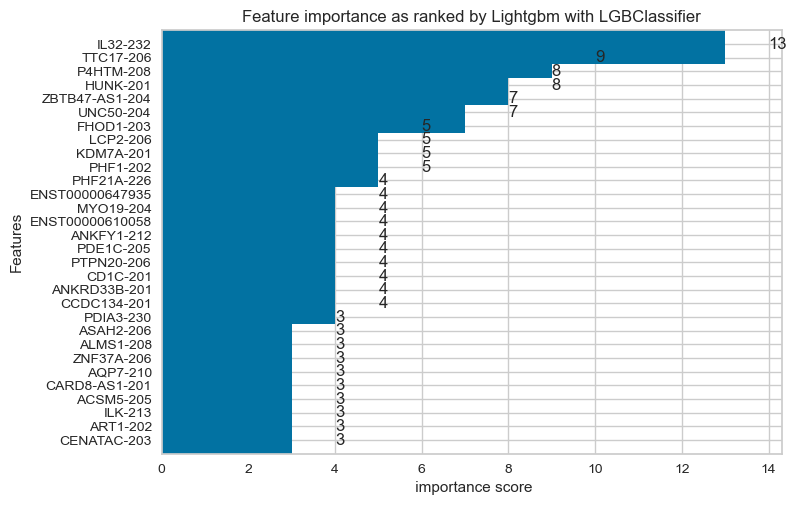

In [20]:
lgbm_class = LGBMClassifier(is_unbalance=True,num_leaves=2,random_state=42)
lgbm_class.fit(X_class, y_class)
y_pred=lgbm_class.predict(X_class)

lightgbm.plot_importance(lgbm_class,max_num_features = 30, 
                         title = "Feature importance as ranked by Lightgbm with LGBClassifier",
                         xlabel = " importance score", ylabel = "Features", height=3)

In [21]:
multiclassDf = pd.DataFrame(lgbm_class.feature_name_, columns =['Features'])
multiclassDf['Importance_values']= lgbm_class.feature_importances_.tolist()
#Sort by importance
multiclassDf = multiclassDf.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDf = multiclassDf[multiclassDf['Importance_values']!=0]

multiclassDf=multiclassDf.iloc[-30:,:]

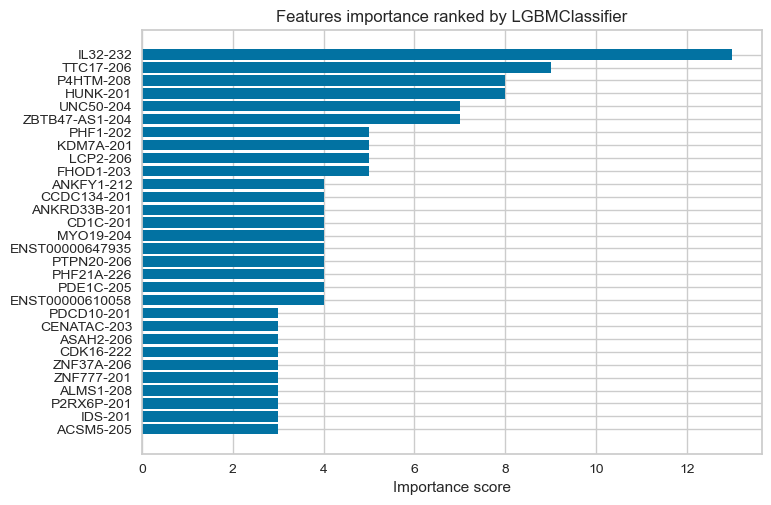

In [22]:
plt.title('Features importance ranked by LGBMClassifier')
plt.xlabel('Importance score')

plt.barh(multiclassDf['Features'],multiclassDf['Importance_values'], height=0.8)
plt.show()

In [24]:
print('Accuracy:',accuracy_score(y_class,y_pred))
balanced_accuracy_score(y_class,y_pred)

Accuracy: 0.8105726872246696


0.7837728937728938

In [25]:
print('F1 score:',f1_score(y_class,y_pred,average='weighted'))
print('MCC:', matthews_corrcoef(y_class,y_pred))

F1 score: 0.8085654078854103
MCC: 0.6937378181034297


In [26]:
print(confusion_matrix(y_class,y_pred))

[[ 36   3  11]
 [  3  48  14]
 [  5   7 100]]


## Explore some of the features

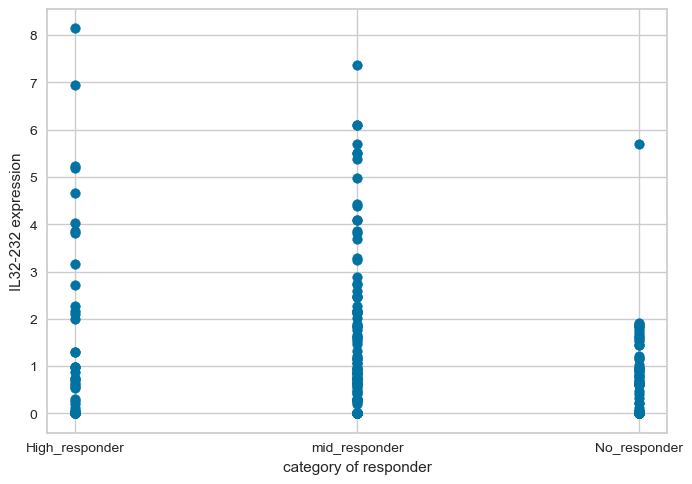

In [27]:
plt.scatter(all_baseline_df["category"],all_baseline_df["IL32-232"])
plt.xlabel("category of responder")
plt.ylabel("IL32-232 expression")
plt.show()

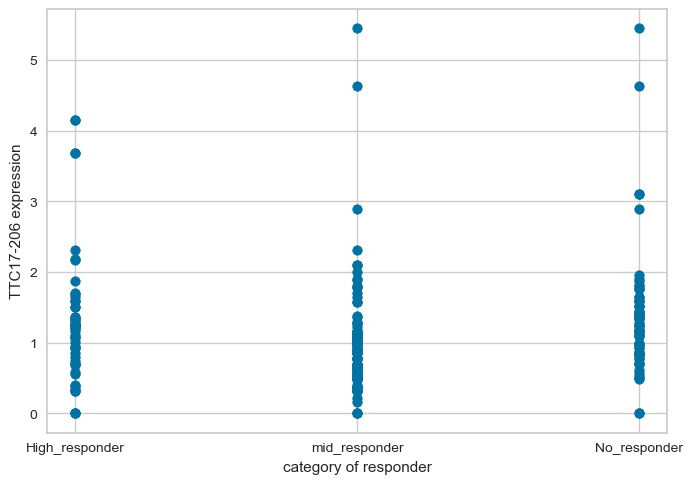

In [28]:
plt.scatter(all_baseline_df["category"],all_baseline_df["TTC17-206"])
plt.xlabel("category of responder")
plt.ylabel("TTC17-206 expression")
plt.show()

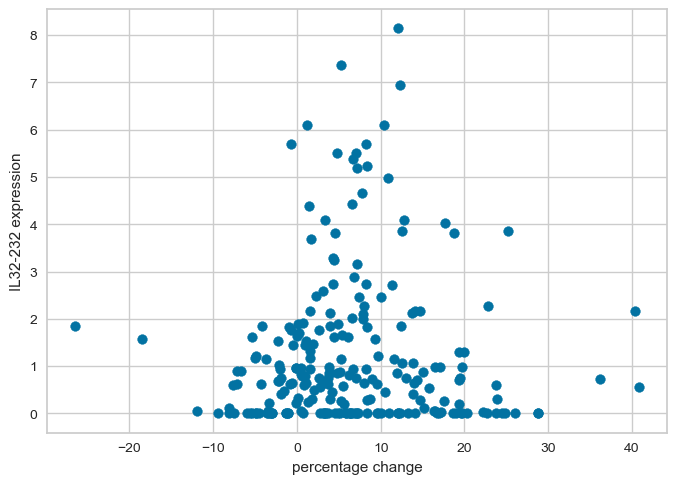

In [29]:
plt.scatter(all_baseline_df["pct_change"],all_baseline_df["IL32-232"])
plt.xlabel("percentage change")
plt.ylabel("IL32-232 expression")
plt.show()

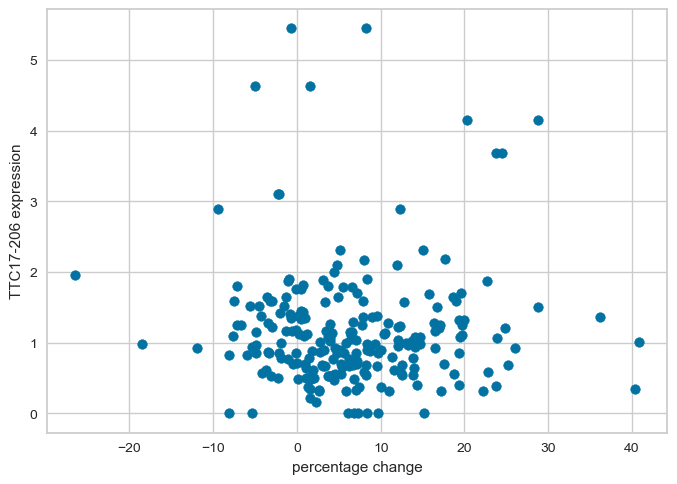

In [30]:
plt.scatter(all_baseline_df["pct_change"],all_baseline_df["TTC17-206"])
plt.xlabel("percentage change")
plt.ylabel("TTC17-206 expression")
plt.show()

## Using the BaggingClassifier, ranked 2 by lazypredict

In [31]:
#bc_class = BaggingClassifier( warm_start=True, random_state=42)
#bc_class.fit(X_class, y_class)
#y_pred=bc_class.predict(X_class)

 96%|=================== | 653/681 [00:22<00:00]       

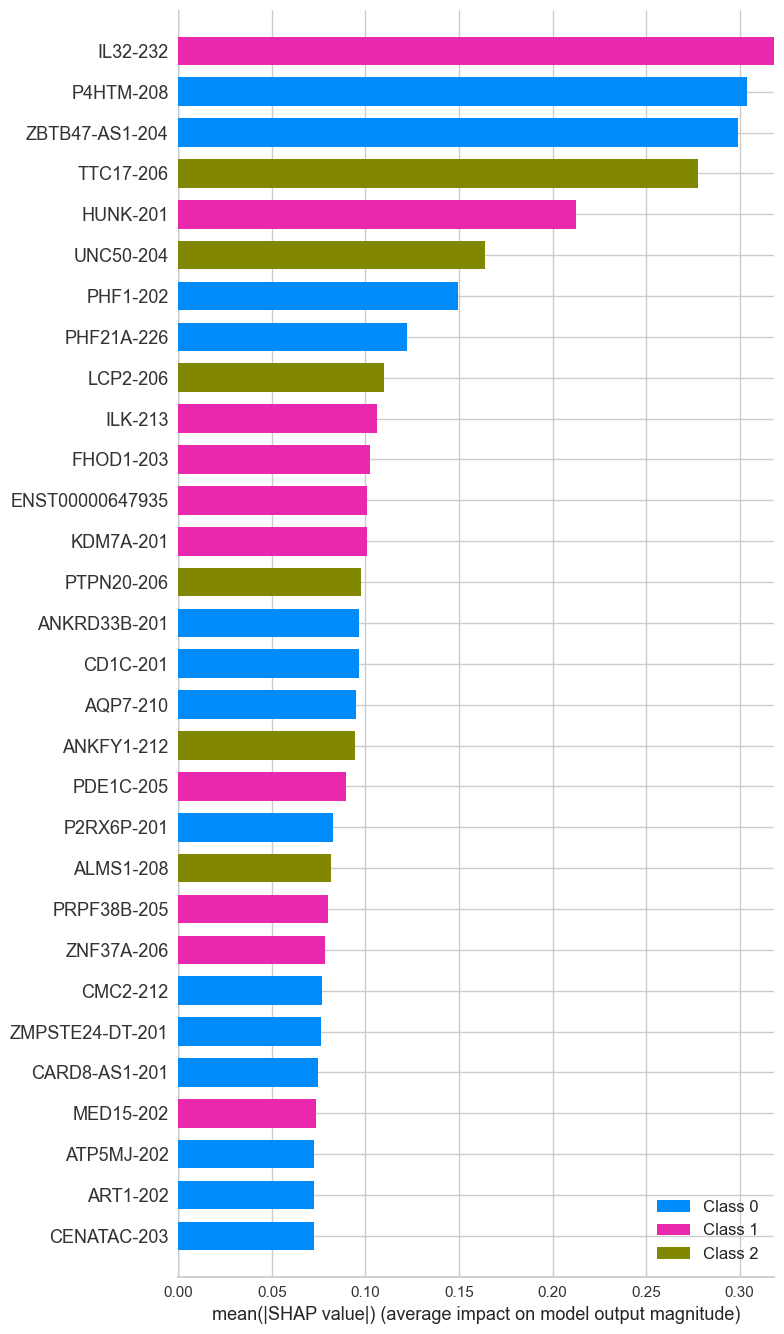

In [32]:
explainer = shap.TreeExplainer(lgbm_class,X_class)
shap_values = explainer.shap_values(X_class)
shap.summary_plot(shap_values,X_class,plot_type="bar", max_display=30)

In [33]:
#the regression modelling
X_reg = all_baseline_df.drop(["participant","sample_id",  "category", "pct_change"], axis = 1)
X_reg = pd.get_dummies(X_reg)
y_reg = all_baseline_df["pct_change"]

In [34]:
#split into train and test. Test set will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg,test_size=.5,random_state =123)

In [84]:
#Use Lazy regressor to predict suitable ML models
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [12:02<00:00, 17.20s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,402161533840767456378880.00,-115374093841150436863639552.00,101273817153630.08,3.53
SGDRegressor,7193496904800804012032.00,-2063706041237455304130560.00,13544623756972.58,1.21
TransformedTargetRegressor,185906656456411054080.00,-53333822911539237093376.00,2177430917540.33,1.22
LinearRegression,185906656456411054080.00,-53333822911539237093376.00,2177430917540.33,1.30
OrthogonalMatchingPursuit,1.01,-1.22,14.05,1.51
PassiveAggressiveRegressor,1.01,-0.86,12.87,1.62
KernelRidge,1.01,-0.80,12.67,1.14
DecisionTreeRegressor,1.01,-0.58,11.85,2.17
GaussianProcessRegressor,1.01,-0.44,11.33,5.63


<AxesSubplot:title={'center':'Feature importance as ranked by Lightgbm with LGBRegressor'}, xlabel=' importance score', ylabel='Features'>

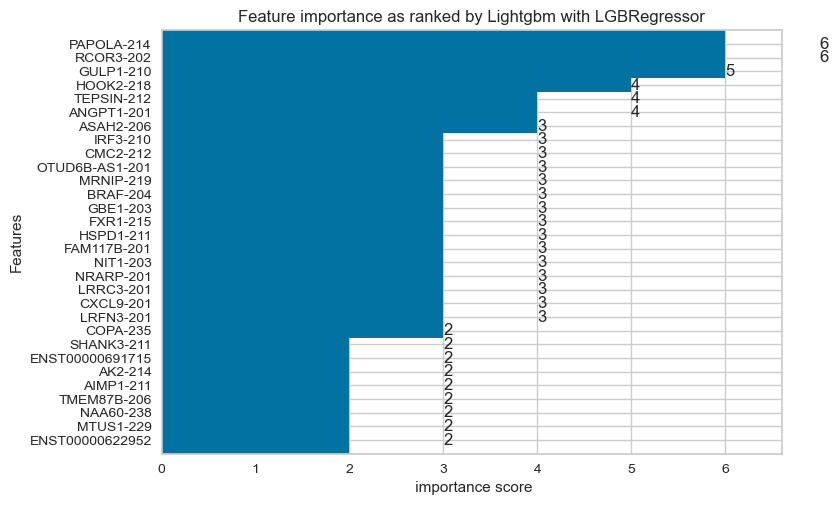

In [35]:
lgb_reg = LGBMRegressor()
lgb_reg.fit(X_reg, y_reg)

y_pred= lgb_reg.predict(X_reg)
lightgbm.plot_importance(lgb_reg,max_num_features = 30, 
                         title = "Feature importance as ranked by Lightgbm with LGBRegressor",
                         xlabel = " importance score", ylabel = "Features", height=3)

In [36]:
multiclassDf = pd.DataFrame(lgb_reg.feature_name_, columns =['Features'])
multiclassDf['Importance_values']= lgb_reg.feature_importances_.tolist()
#Sort by importance
multiclassDf = multiclassDf.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDf = multiclassDf[multiclassDf['Importance_values']!=0]

multiclassDf=multiclassDf.iloc[-30:,:]

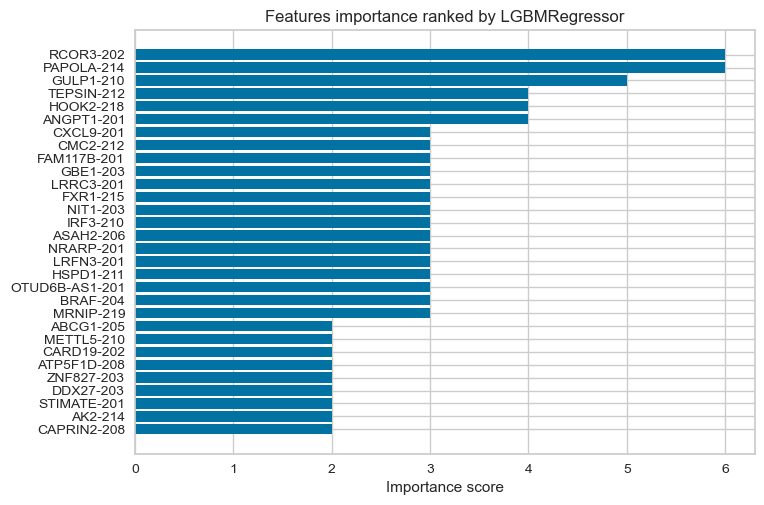

In [37]:
plt.title('Features importance ranked by LGBMRegressor')
plt.xlabel('Importance score')

plt.barh(multiclassDf['Features'],multiclassDf['Importance_values'], height=0.8)
plt.show()

In [38]:
mean_squared_error(y_reg, y_pred)

34.01805021076912

In [39]:
mean_absolute_error(y_reg, y_pred)

3.8935640932007267

In [40]:
mean_absolute_percentage_error(y_reg, y_pred)

908087964763.2832

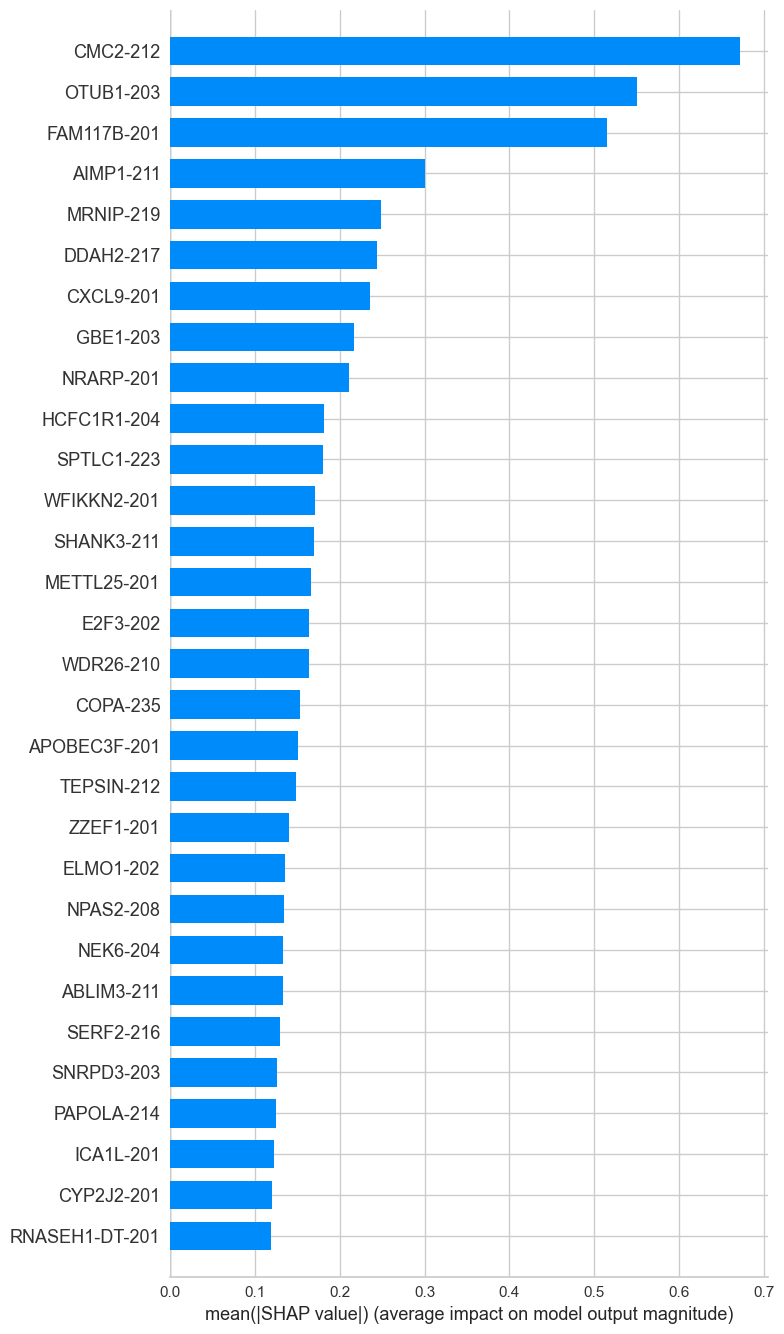

In [41]:
explainer = shap.TreeExplainer(lgb_reg,X_reg)
shap_values = explainer.shap_values(X_reg)
shap.summary_plot(shap_values,X_reg,plot_type="bar", max_display=30)

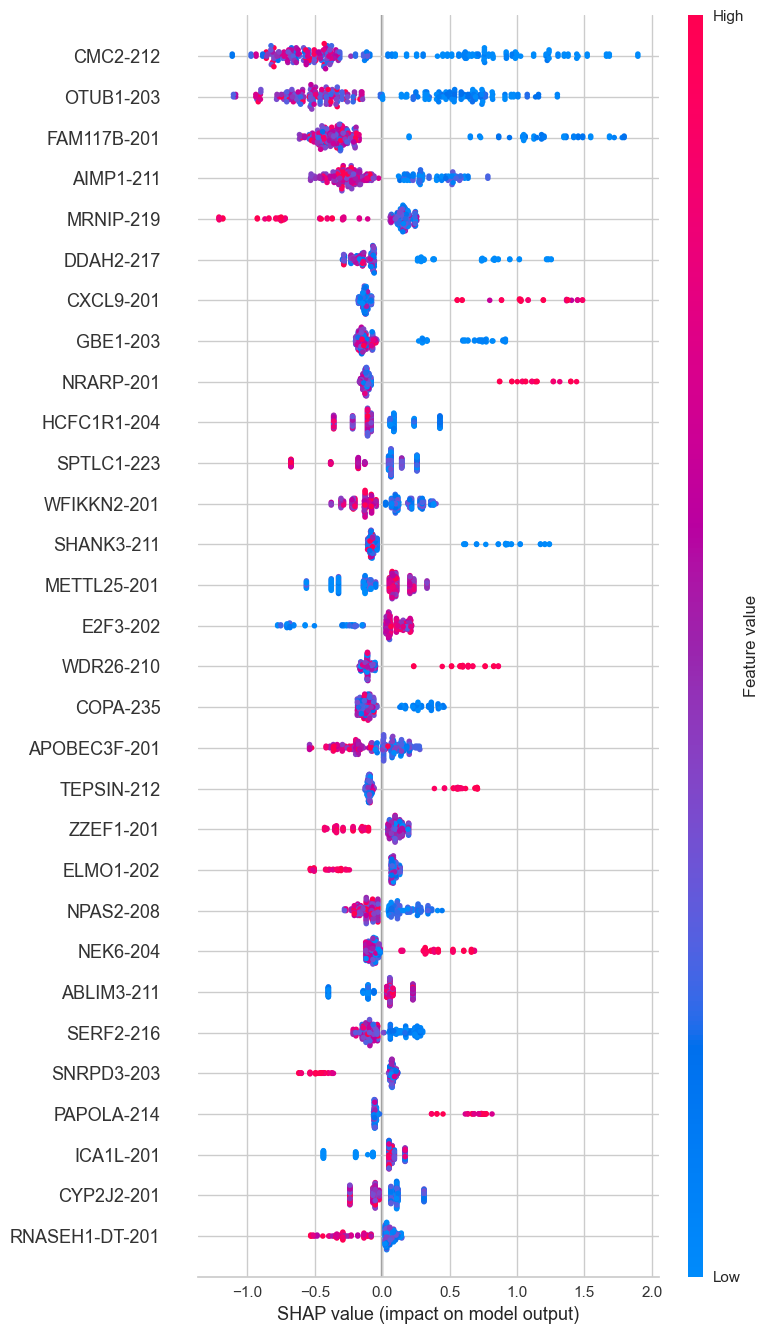

In [42]:
shap.summary_plot(shap_values,X_reg, max_display=30)

## Checking if height and weight may have an impact

In [43]:
#the regression modelling
#removing the height and weight variables from the training data
X_reg2 = all_baseline_df.drop(["participant","sample_id",  "category", "pct_change", "height", "weight"], axis = 1)
X_reg2 = pd.get_dummies(X_reg2)
y_reg2 = all_baseline_df["pct_change"]

In [44]:
#split into train and test. Test set will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_reg2, y_reg2,test_size=.5,random_state =123)

In [89]:
#Use Lazy regressor to predict suitable ML models
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [11:47<00:00, 16.84s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,389040666283030070951936.00,-111603028656908863440683008.00,99604972110378.55,3.82
SGDRegressor,17480484212299855298560.00,-5014578550671788652625920.00,21113500714450.38,1.00
TransformedTargetRegressor,230384905583721440.00,-66089885835415166976.00,76649712241.71,0.99
LinearRegression,230384905583721440.00,-66089885835415166976.00,76649712241.71,1.05
OrthogonalMatchingPursuit,1.01,-1.22,14.05,1.05
PassiveAggressiveRegressor,1.01,-0.86,12.87,1.03
KernelRidge,1.01,-0.81,12.67,1.16
ExtraTreeRegressor,1.01,-0.80,12.66,2.34
DecisionTreeRegressor,1.01,-0.65,12.10,3.17


<AxesSubplot:title={'center':'Feature importance as ranked by Lightgbm with LGBRegressor (w/o height and weight)'}, xlabel=' importance score', ylabel='Features'>

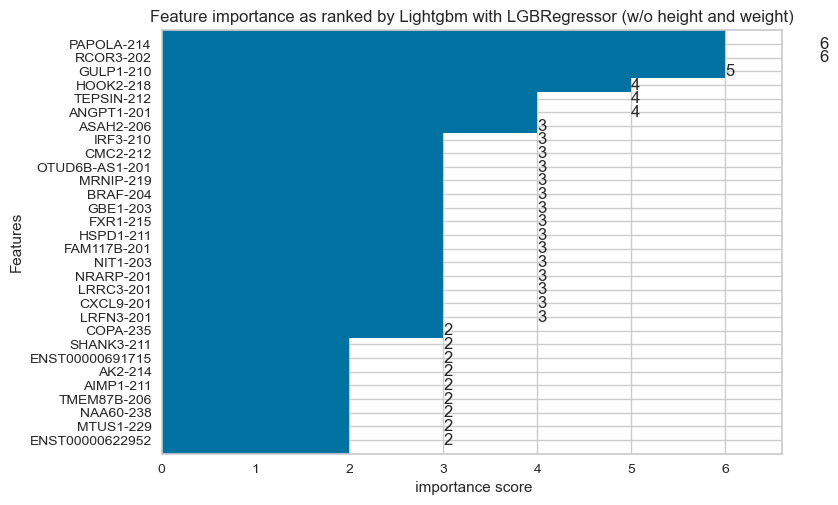

In [45]:
lgb_reg2 = LGBMRegressor()
lgb_reg2.fit(X_reg2, y_reg2)

y_pred2= lgb_reg2.predict(X_reg2)
lightgbm.plot_importance(lgb_reg2,max_num_features = 30, 
                         title = "Feature importance as ranked by Lightgbm with LGBRegressor (w/o height and weight)",
                         xlabel = " importance score", ylabel = "Features", height=3)

In [46]:
multiclassDf = pd.DataFrame(lgb_reg2.feature_name_, columns =['Features'])
multiclassDf['Importance_values']= lgb_reg2.feature_importances_.tolist()
#Sort by importance
multiclassDf = multiclassDf.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDf = multiclassDf[multiclassDf['Importance_values']!=0]

multiclassDf=multiclassDf.iloc[-30:,:]

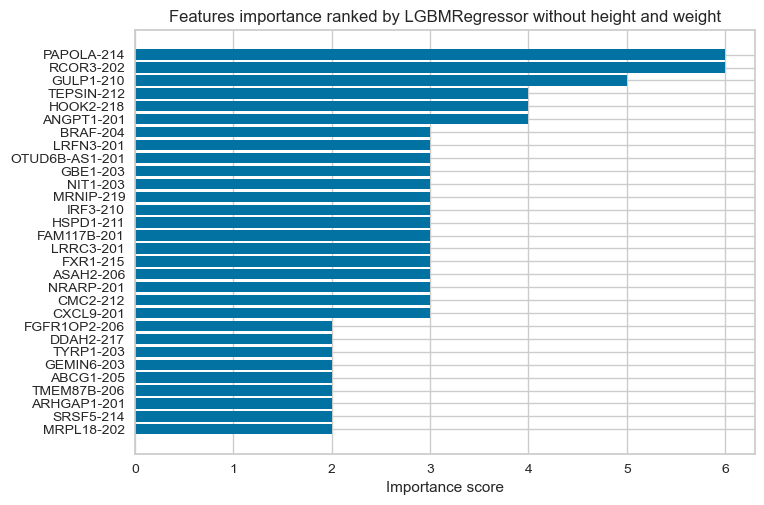

In [47]:
plt.title('Features importance ranked by LGBMRegressor without height and weight')
plt.xlabel('Importance score')

plt.barh(multiclassDf['Features'],multiclassDf['Importance_values'], height=0.8)
plt.show()

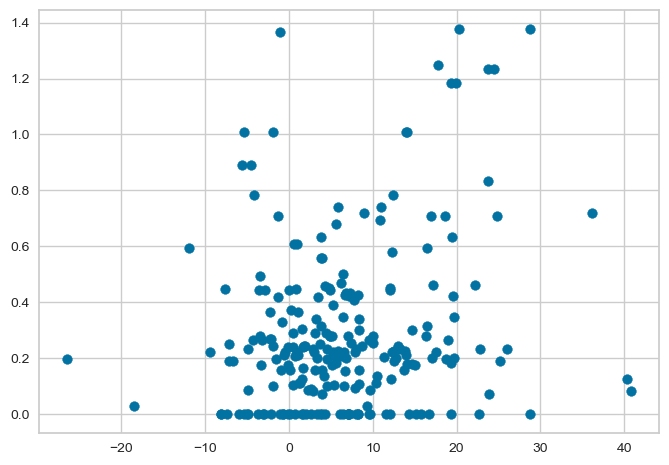

In [48]:
plt.scatter( all_baseline_df["pct_change"], all_baseline_df["PAPOLA-214"] )
plt.show;

In [49]:
mean_absolute_error(y_reg2, y_pred2)

3.8935640932007267

In [50]:
mean_absolute_percentage_error(y_reg2, y_pred2)

908087964763.2832

In [51]:
mean_squared_error(y_reg2, y_pred2)

34.01805021076912

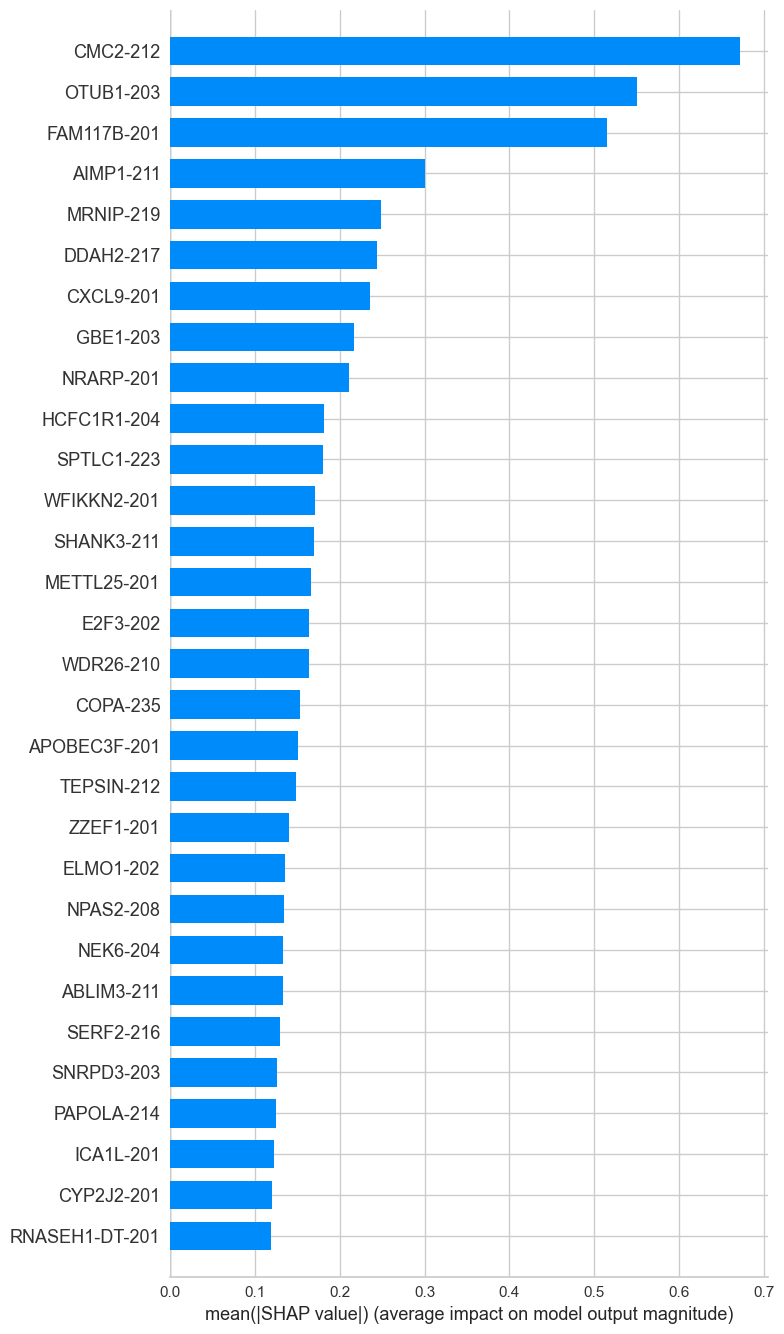

In [52]:
explainer = shap.TreeExplainer(lgb_reg2,X_reg2)
shap_values = explainer.shap_values(X_reg2)
shap.summary_plot(shap_values,X_reg2,plot_type="bar", max_display=30)

In [53]:
len(shap_values)

227

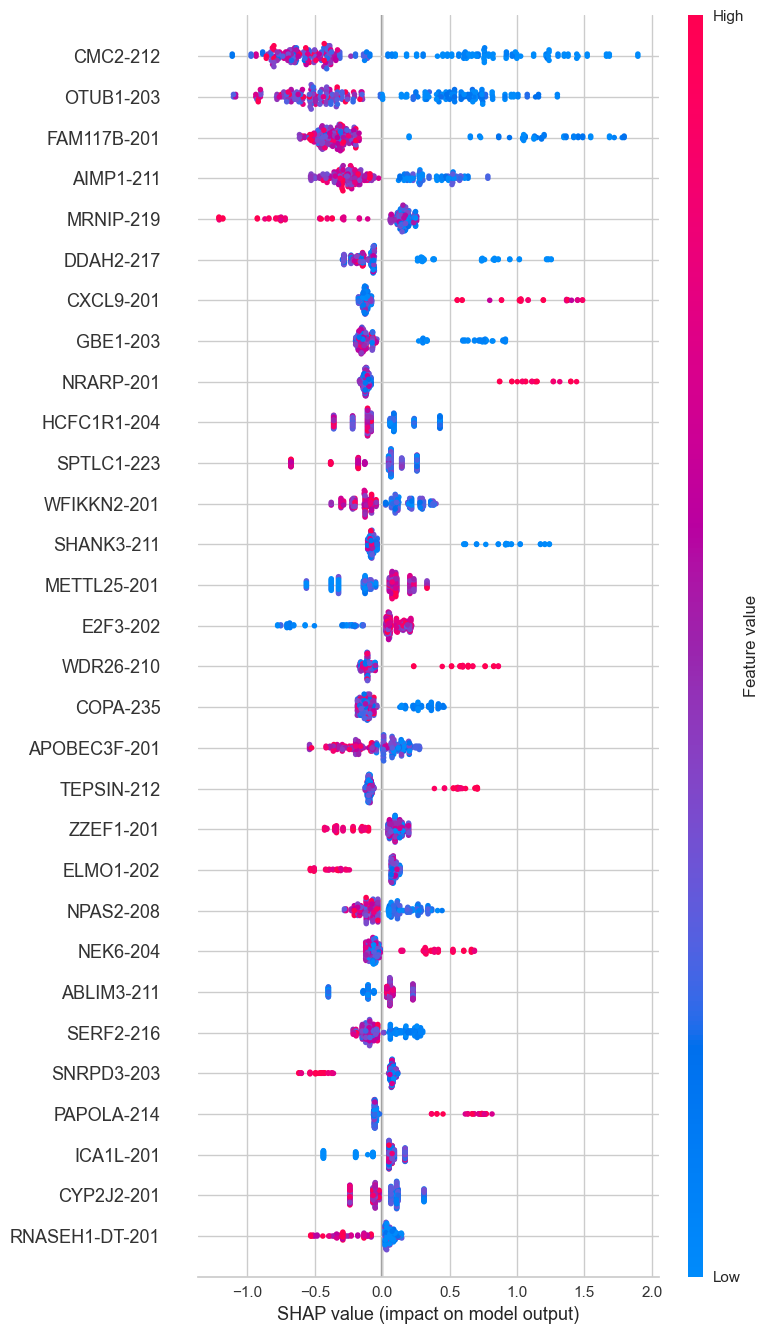

In [54]:
shap.summary_plot(shap_values,X_reg2, max_display=30)

In [55]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_reg2,y_reg2)
score = xgbr.score(X_reg2,y_reg2) 
f = xgbr.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame.from_dict(data=f, 
                                       orient='index', columns = ["Scores"])
importance_df = importance_df.sort_values(by = "Scores", axis = 0, ascending = True)
importance_df= importance_df[importance_df['Scores']!= 0]

importance_df = importance_df.reset_index()
importance_df=importance_df.iloc[-30:,:]
importance_df = importance_df.rename(columns = {"index": "Feature"})

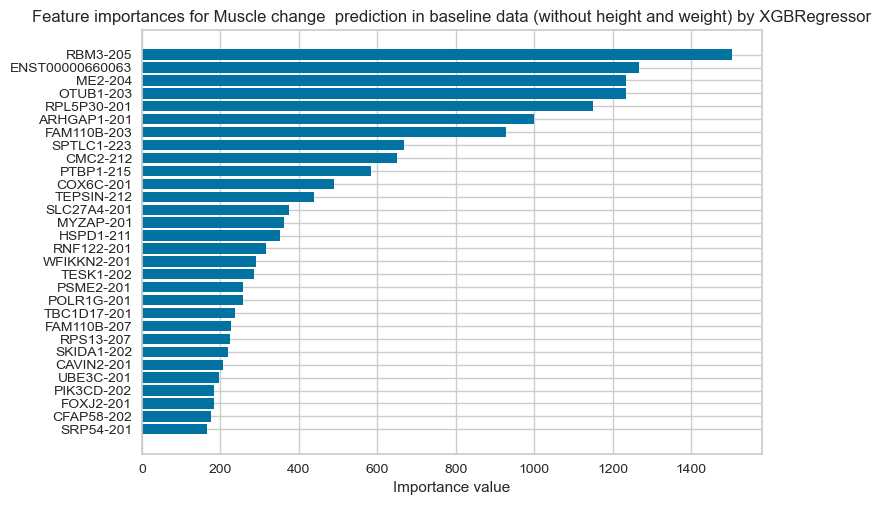

In [56]:
plt.title('Feature importances for Muscle change  prediction in baseline data (without height and weight) by XGBRegressor')
plt.xlabel('Importance value')

plt.barh(importance_df['Feature'],importance_df['Scores'], height=0.8)
plt.show()

In [57]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_reg,y_reg)
score = xgbr.score(X_reg,y_reg) 
f = xgbr.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame.from_dict(data=f, 
                                       orient='index', columns = ["Scores"])
importance_df = importance_df.sort_values(by = "Scores", axis = 0, ascending = True)
importance_df= importance_df[importance_df['Scores']!= 0]

importance_df = importance_df.reset_index()
importance_df=importance_df.iloc[-30:,:]
importance_df = importance_df.rename(columns = {"index": "Feature"})

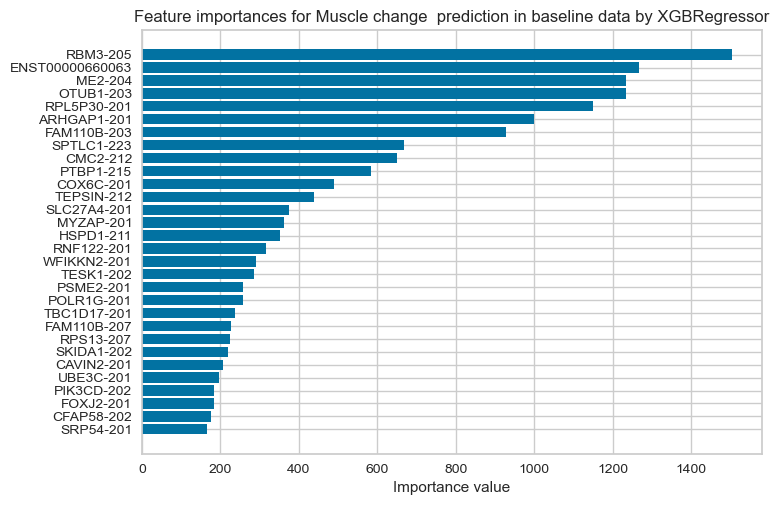

In [58]:
plt.title('Feature importances for Muscle change  prediction in baseline data by XGBRegressor')
plt.xlabel('Importance value')

plt.barh(importance_df['Feature'],importance_df['Scores'], height=0.8)
plt.show()

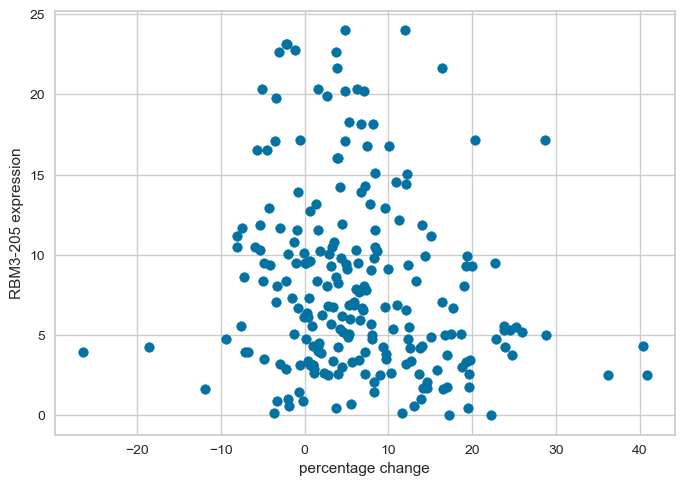

In [59]:
plt.scatter(all_baseline_df["pct_change"],all_baseline_df["RBM3-205"])
plt.xlabel("percentage change")
plt.ylabel("RBM3-205 expression")
plt.show()

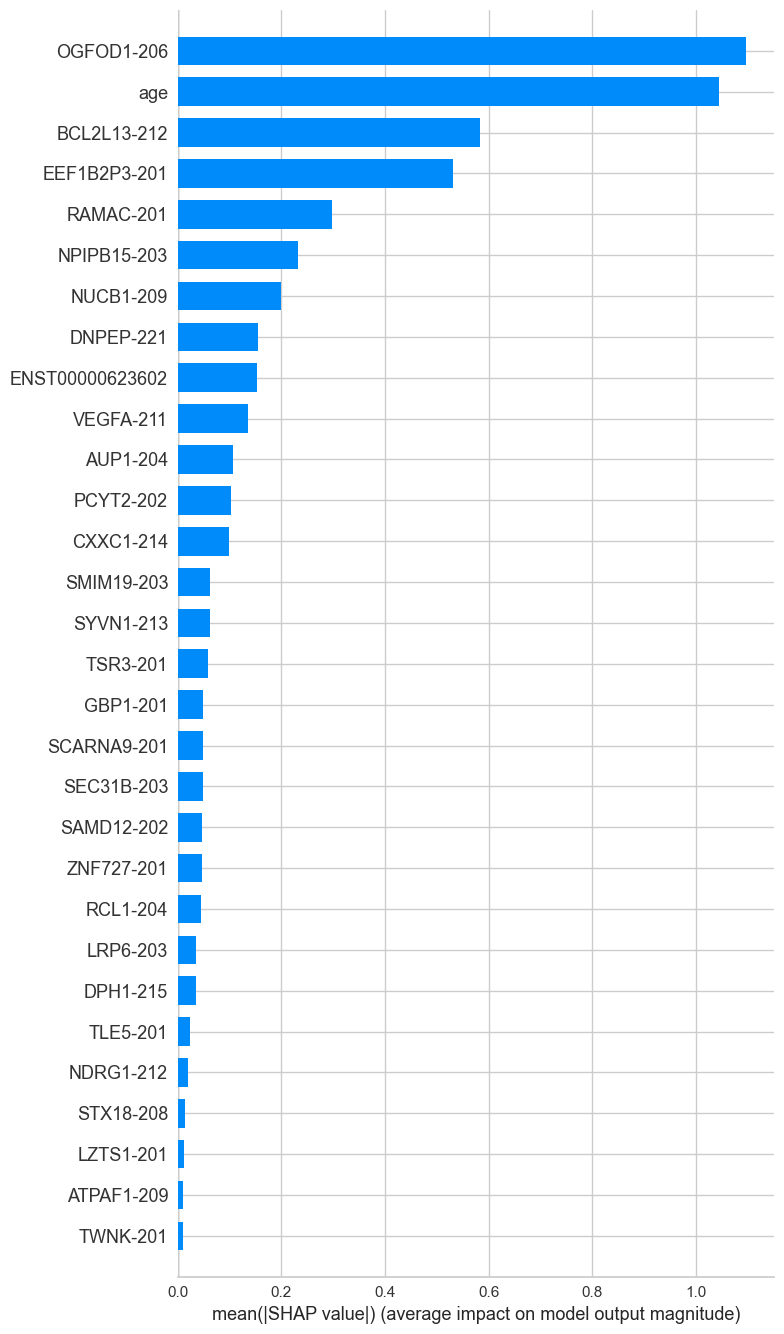

In [60]:
explainer = shap.TreeExplainer(xgbr,X_reg2)
shap_values = explainer.shap_values(X_reg2)
shap.summary_plot(shap_values,X_reg2,plot_type="bar", max_display=30)

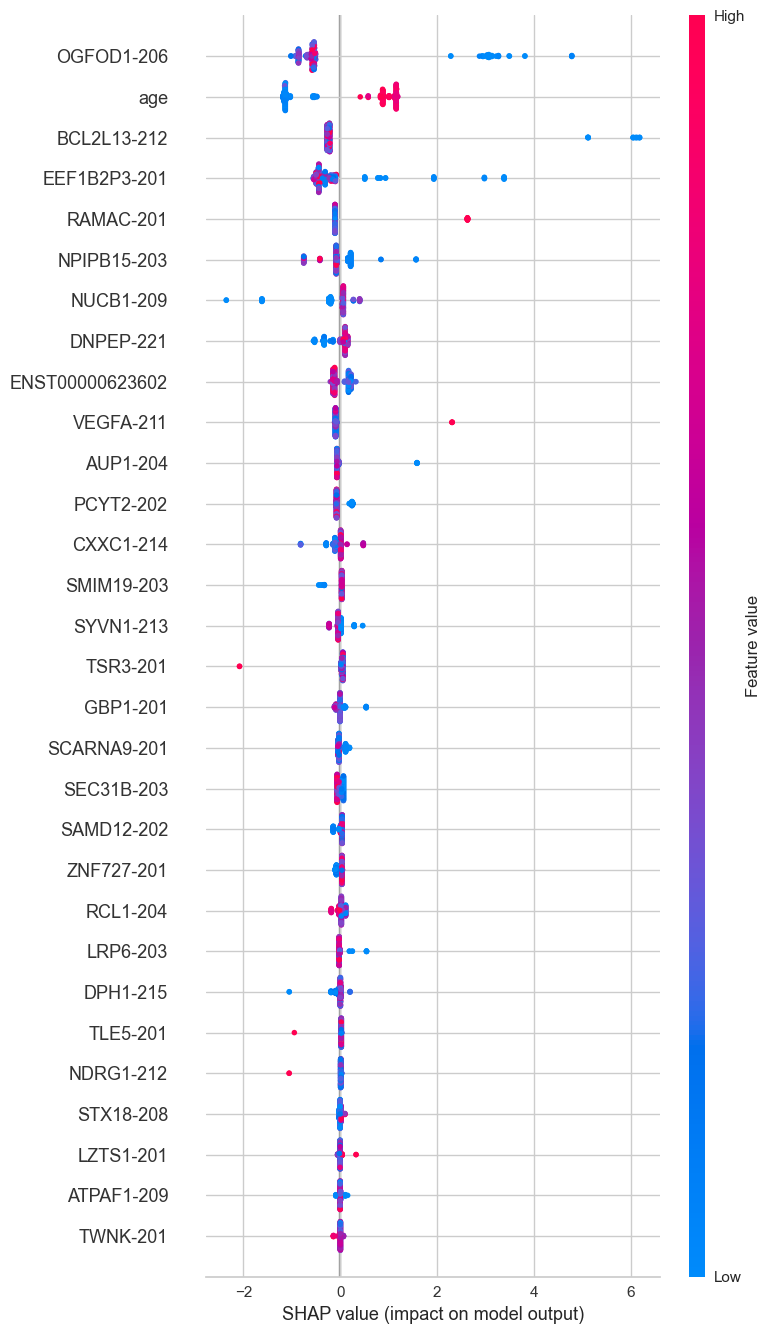

In [61]:
shap.summary_plot(shap_values,X_reg2, max_display=30)

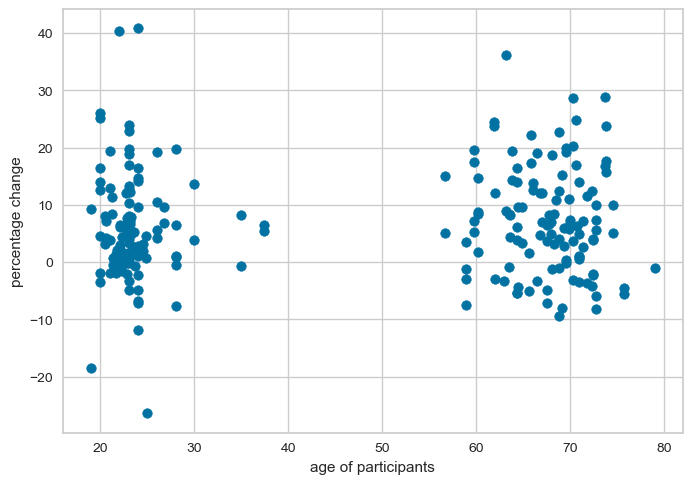

In [62]:
plt.scatter(all_baseline_df["age"], all_baseline_df["pct_change"])
plt.ylabel("percentage change")
plt.xlabel("age of participants")
plt.show()

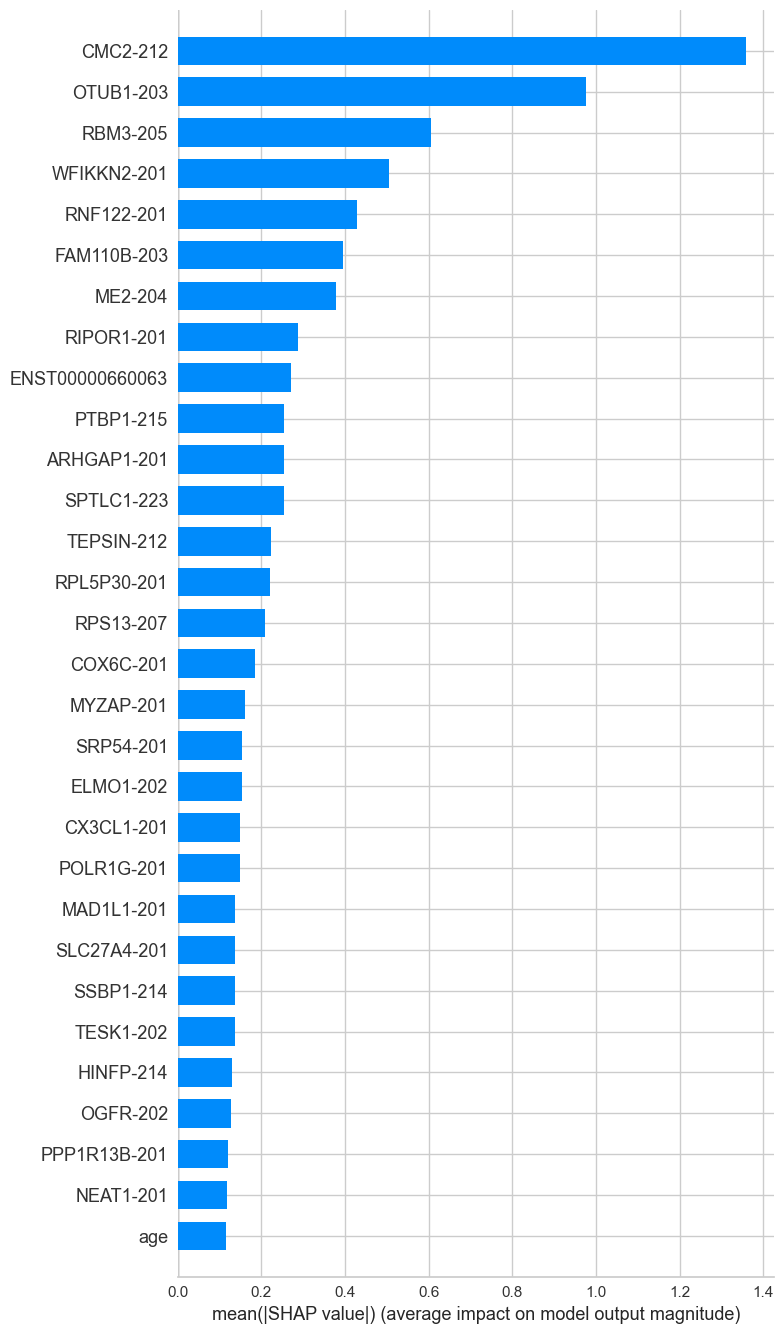

In [63]:
explainer = shap.TreeExplainer(xgbr,X_reg)
shap_values = explainer.shap_values(X_reg)
shap.summary_plot(shap_values,X_reg,plot_type="bar", max_display=30)

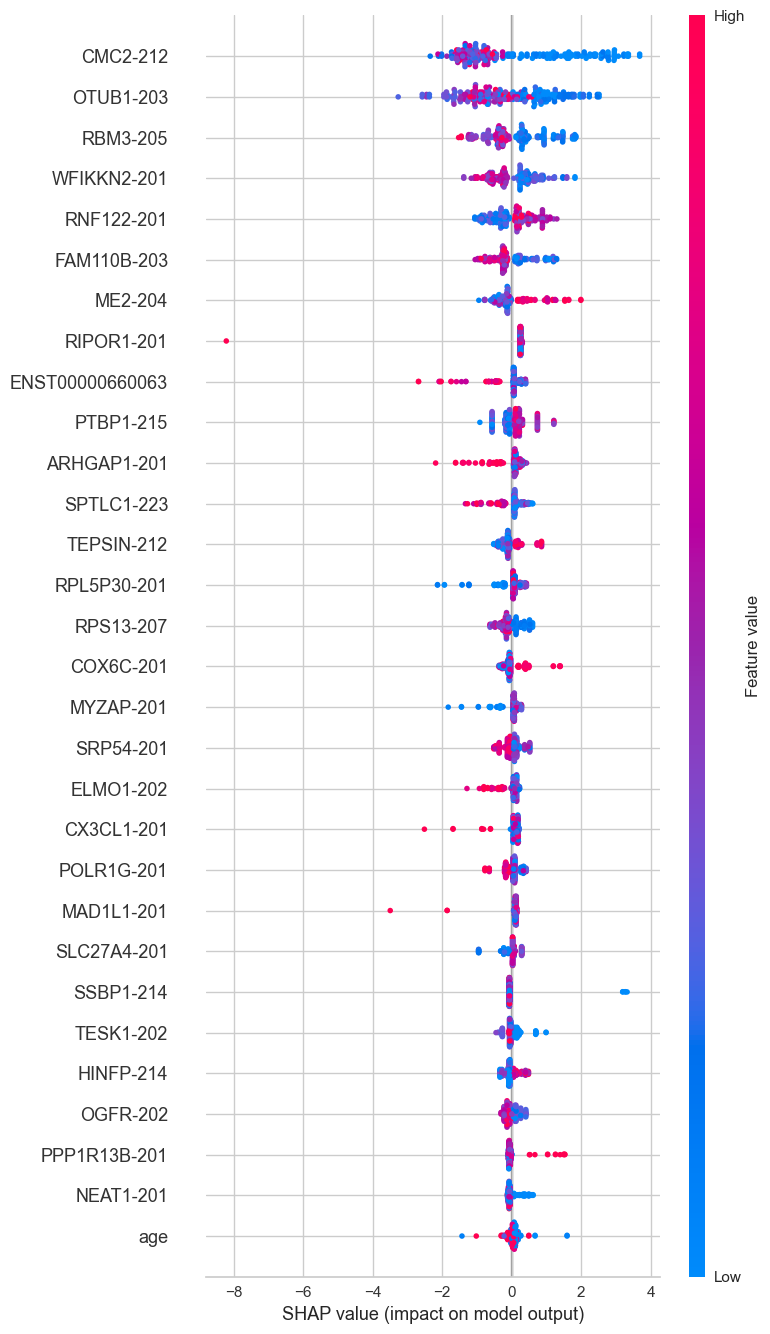

In [64]:
shap.summary_plot(shap_values,X_reg, max_display=30)

## I will now extract the extremes of the dataset (high responders vs no responders)

In [65]:
extremes = all_baseline_df.loc[(all_baseline_df["category"] == "High_responder") | 
                               (all_baseline_df["category"] == "No_responder") ]
extremes

,participant,sample_id,sex,condition,study,age,height,weight,pct_change,category,...,GATA2-213,UQCRHL-202,IFNGR1-215,FANCG-218,IL10RB-208,EPG5-219,PTK2-258,IRAK4-215,PHKB-218,IRF2-210
0,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,22.21,High_responder,...,1.61,1.71,1.46,0.00,1.72,0.23,3.19,4.61,2.72,1.00
1,FP102,X102PreExcVLR12,female,RM10,copd,65.80,151.50,84.00,17.24,High_responder,...,1.61,1.71,1.46,0.00,1.72,0.23,3.19,4.61,2.72,1.00
9,FP110,X110PreExcVLL58,male,RM30,copd,72.30,177.00,76.00,-4.12,No_responder,...,1.75,2.77,5.49,0.00,0.43,0.17,8.07,4.72,5.88,1.39
12,FP111,X111PreExcVLR69,female,RM30,copd,72.70,161.00,46.00,-8.13,No_responder,...,0.71,5.08,0.00,1.11,0.68,0.00,2.48,0.00,4.95,0.00
13,FP111,X111PreExcVLR69,female,RM30,copd,72.70,161.00,46.00,-5.91,No_responder,...,0.71,5.08,0.00,1.11,0.68,0.00,2.48,0.00,4.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,FP5,FP5w0R,male,multiple,vol,22.60,183.00,81.00,0.00,No_responder,...,2.01,6.00,0.00,0.26,0.42,0.17,3.07,3.10,4.09,0.38
222,FP6,FP6w0R,female,single,vol,21.80,156.00,50.00,-0.81,No_responder,...,1.40,5.81,3.98,0.27,1.22,0.60,2.46,0.44,4.52,0.44
223,FP7,FP7w0L,male,multiple,vol,21.20,194.00,106.00,8.34,High_responder,...,1.28,2.19,3.55,0.74,0.26,0.10,3.60,3.84,0.00,0.75
224,FP7,FP7w0R,male,single,vol,21.20,194.00,106.00,11.31,High_responder,...,1.42,2.52,3.15,0.72,0.42,0.29,3.88,4.17,5.15,0.15


In [66]:
#the classification modelling
X_class = extremes.drop(["participant","sample_id",  "category", "pct_change"], axis = 1)
X_class = pd.get_dummies(X_class)
y_class = extremes["category"]

In [67]:
#split into train and test. Test set will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class,test_size=.5,random_state =123)

In [132]:
#Use Lazy regressor to predict suitable ML models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:48<00:00,  3.75s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.64,0.66,None,0.64,2.26
LogisticRegression,0.60,0.63,None,0.60,2.88
RandomForestClassifier,0.62,0.63,None,0.62,2.74
LinearSVC,0.60,0.62,None,0.61,10.77
ExtraTreeClassifier,0.64,0.61,None,0.63,1.74
RidgeClassifierCV,0.59,0.60,None,0.59,1.81
RidgeClassifier,0.59,0.60,None,0.59,1.99
LinearDiscriminantAnalysis,0.59,0.60,None,0.59,2.40
SGDClassifier,0.57,0.58,None,0.57,1.79


<AxesSubplot:title={'center':'Feature importance among the extreme categories as ranked by Lightgbm with LGBClassifier'}, xlabel=' importance score', ylabel='Features'>

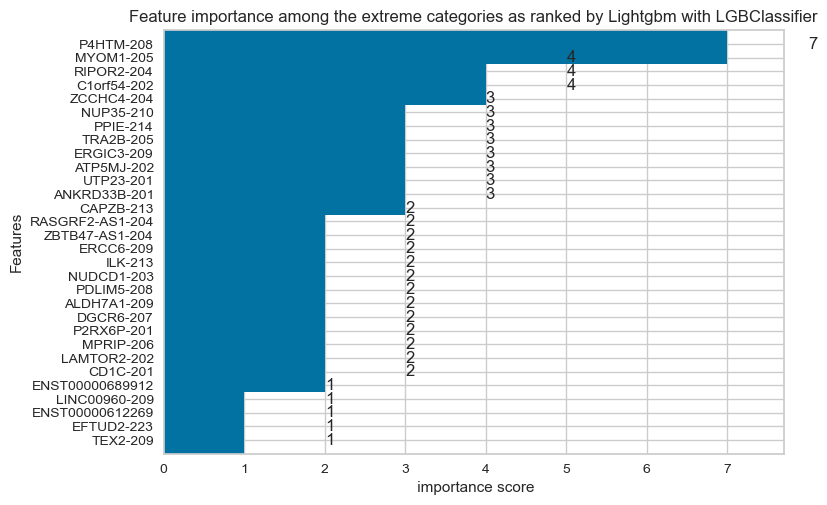

In [68]:
lgbm_class = LGBMClassifier(is_unbalance=True,num_leaves=2,random_state=42)
lgbm_class.fit(X_class, y_class)
y_pred=lgbm_class.predict(X_class)

lightgbm.plot_importance(lgbm_class,max_num_features = 30, 
                         title = "Feature importance among the extreme categories as ranked by Lightgbm with LGBClassifier",
                         xlabel = " importance score", ylabel = "Features", height=3)

In [69]:
lgbm_class.score(X_class, y_class)

0.9478260869565217

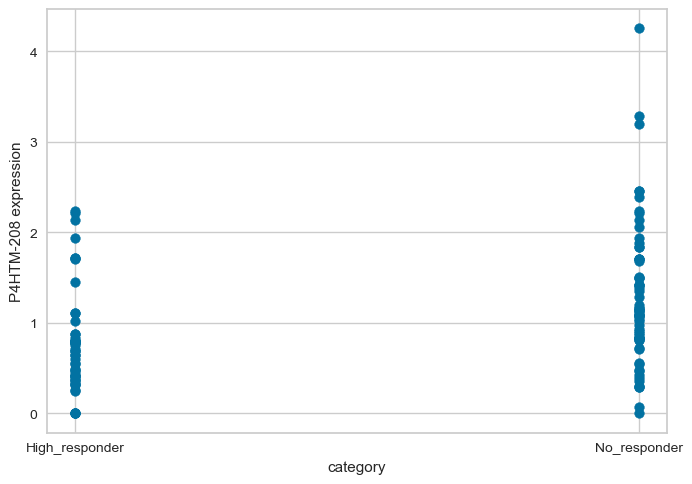

In [70]:
plt.scatter(extremes["category"],extremes["P4HTM-208"])
plt.xlabel("category")
plt.ylabel("P4HTM-208 expression")
plt.show()

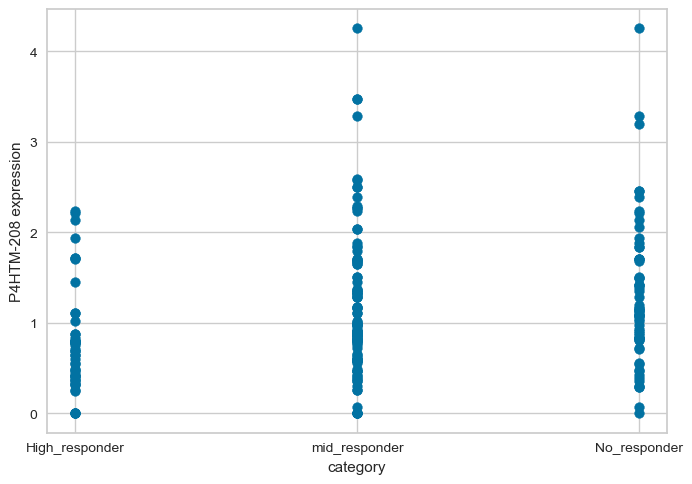

In [71]:
plt.scatter(all_baseline_df["category"],all_baseline_df["P4HTM-208"])
plt.xlabel("category")
plt.ylabel("P4HTM-208 expression")
plt.show()

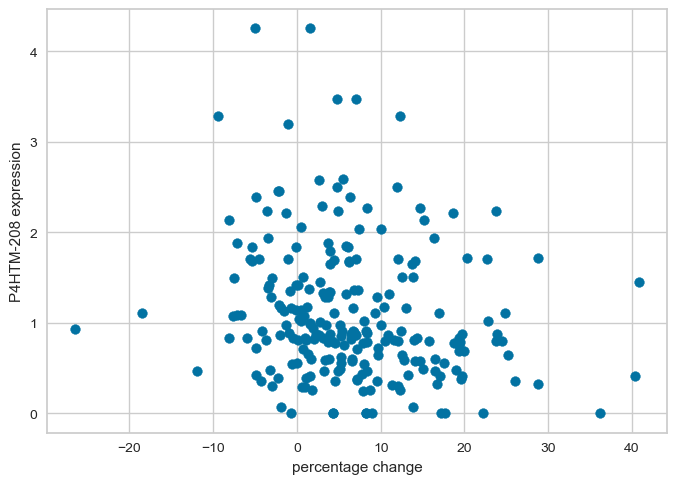

In [72]:
plt.scatter(all_baseline_df["pct_change"],all_baseline_df["P4HTM-208"])
plt.xlabel("percentage change")
plt.ylabel("P4HTM-208 expression")
plt.show()

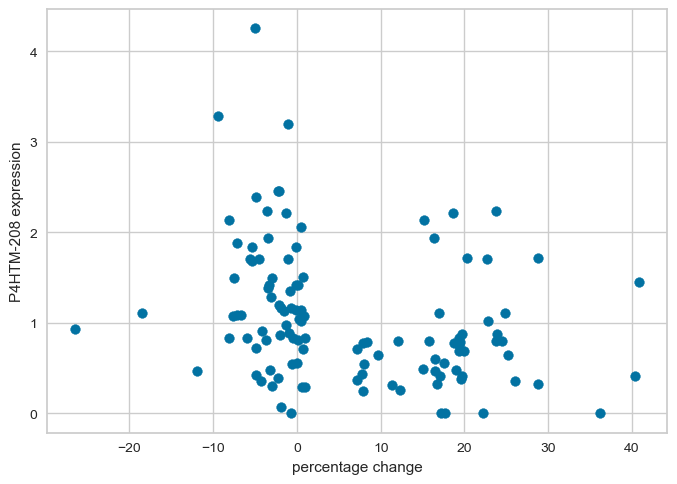

In [73]:
plt.scatter(extremes["pct_change"],extremes["P4HTM-208"])
plt.xlabel("percentage change")
plt.ylabel("P4HTM-208 expression")
plt.show()

In [74]:
multiclassDf = pd.DataFrame(lgbm_class.feature_name_, columns =['Features'])
multiclassDf['Importance_values']= lgbm_class.feature_importances_.tolist()
#Sort by importance
multiclassDf = multiclassDf.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDf = multiclassDf[multiclassDf['Importance_values']!=0]

multiclassDf=multiclassDf.iloc[-30:,:]

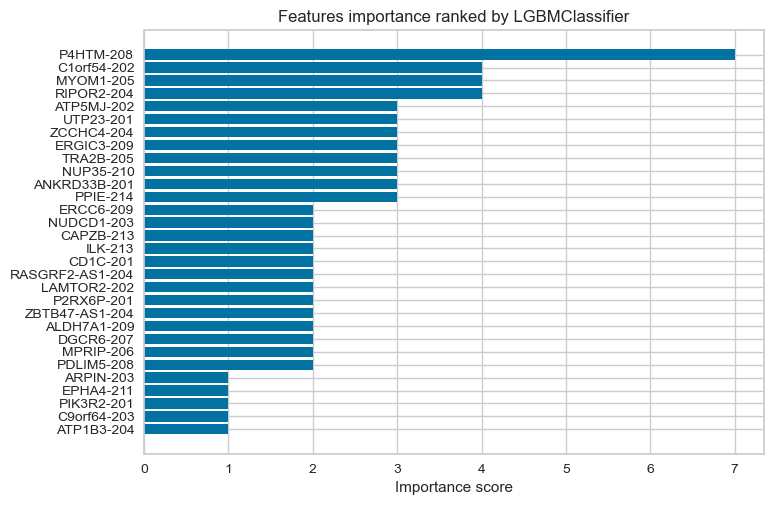

In [75]:
plt.title('Features importance ranked by LGBMClassifier')
plt.xlabel('Importance score')

plt.barh(multiclassDf['Features'],multiclassDf['Importance_values'], height=0.8)
plt.show()

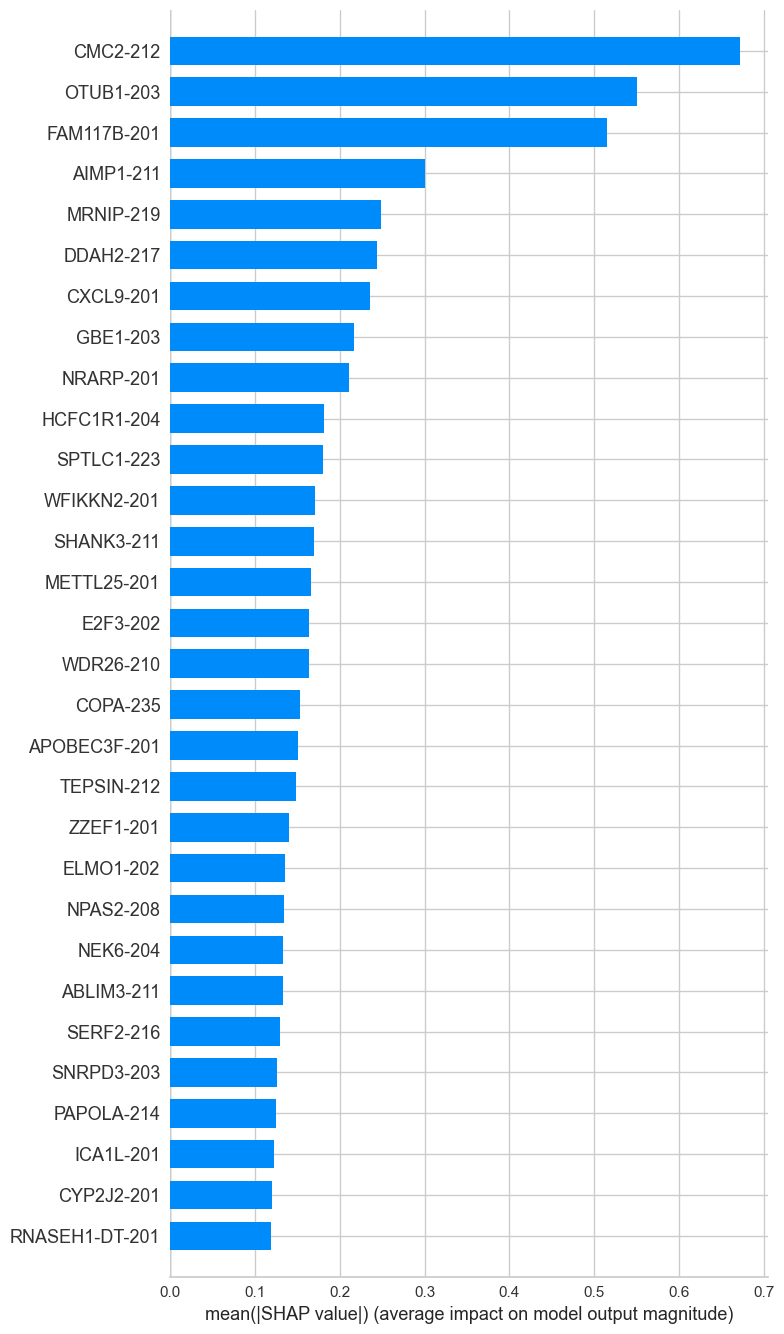

In [76]:
explainer = shap.TreeExplainer(lgb_reg,X_reg)
shap_values = explainer.shap_values(X_reg)
shap.summary_plot(shap_values,X_reg,plot_type="bar", max_display=30)

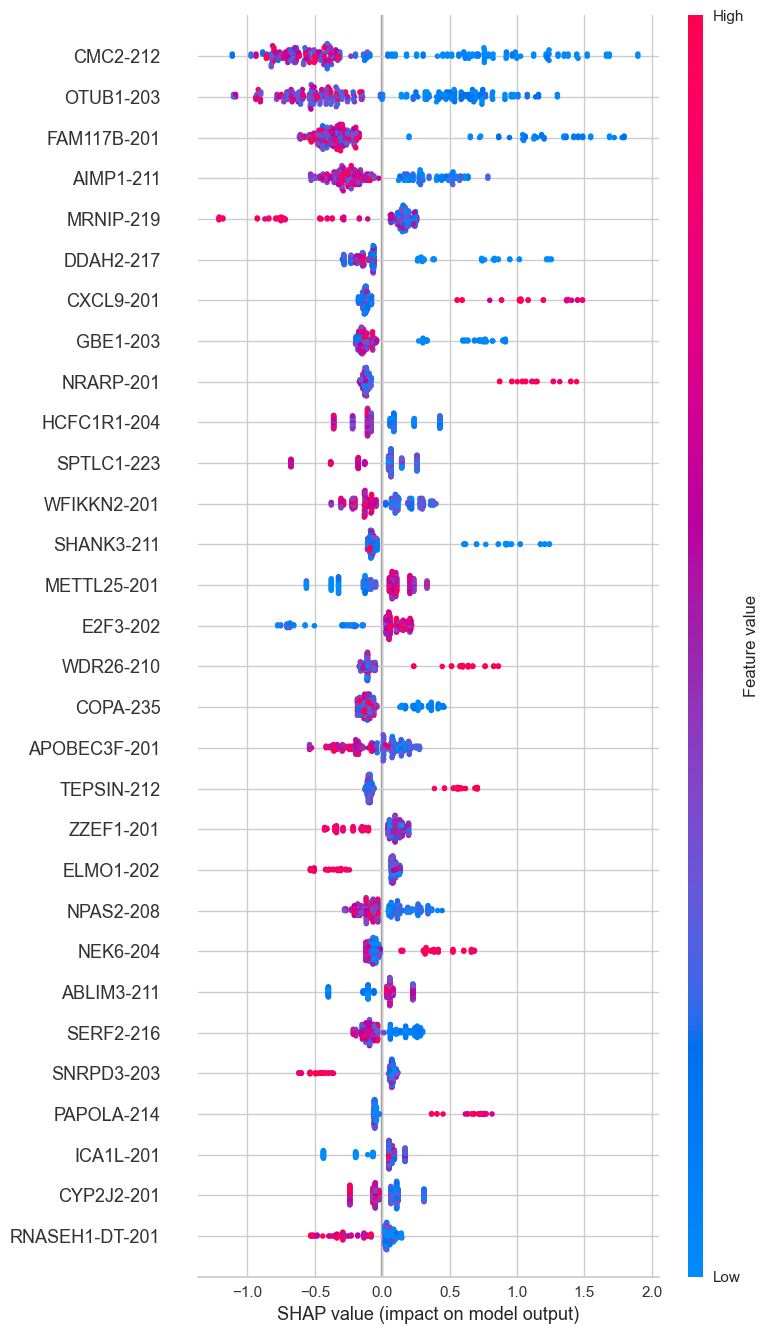

In [77]:
shap.summary_plot(shap_values,X_reg, max_display=30)

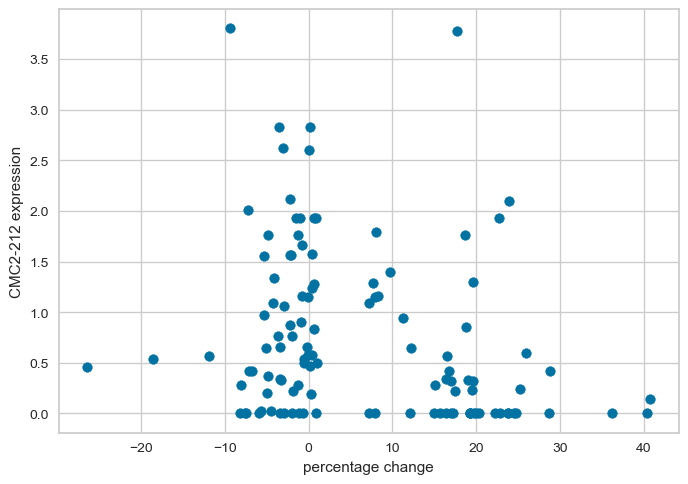

In [78]:
plt.scatter(extremes["pct_change"],extremes["CMC2-212"])
plt.xlabel("percentage change")
plt.ylabel("CMC2-212 expression")
plt.show()

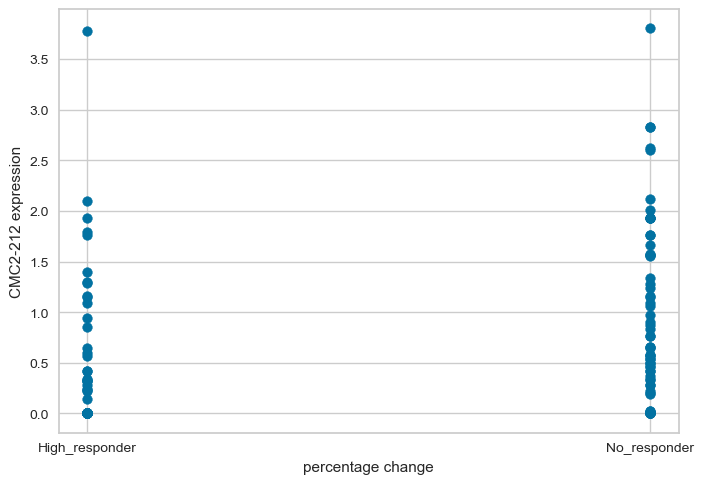

In [79]:
plt.scatter(extremes["category"],extremes["CMC2-212"])
plt.xlabel("percentage change")
plt.ylabel("CMC2-212 expression")
plt.show()

In [80]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1,)
rfe.fit(X_class, y_class)
ranking = rfe.ranking_
ranking

array([ 1053,  4369,  9034, ..., 25099, 25966, 31482])